IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOADING DATA

In [3]:
student_performance=pd.read_csv(r"C:\Users\jayat\OneDrive\Documents\student\student-mat.csv",sep=';')

RANDOM 5 VALUES

In [4]:
student_performance.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
90,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,3,1,3,4,0,7,7,8
269,GP,F,18,R,GT3,T,2,1,other,other,...,4,3,5,1,2,3,0,6,0,0
43,GP,M,15,U,GT3,T,2,2,services,services,...,5,4,1,1,1,1,0,8,8,11
89,GP,M,16,U,LE3,A,4,4,teacher,health,...,4,1,3,3,5,5,18,8,6,7
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


SHAPE

In [5]:
print('DATASET SHAPE:',student_performance.shape)

DATASET SHAPE: (395, 33)


CHECKING FOR MISSING VALUES

In [6]:
student_performance.isnull().sum().sum()

0

CHECKING FOR DATA TYPE

In [7]:
student_performance.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

RENAMING COLUMNS

In [8]:
rename_cols = {
    'school': 'school_name',
    'sex': 'gender',
    'age': 'age',
    'address': 'urban_or_rural',
    'famsize': 'family_size',
    'Pstatus': 'parents_together',
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'Mjob': 'mother_job',
    'Fjob': 'father_job',
    'reason': 'school_choice_reason',
    'guardian': 'guardian_name',
    'traveltime': 'school_travel_time',
    'studytime': 'weekly_study_time',
    'failures': 'past_class_failures',
    'schoolsup': 'school_support',
    'famsup': 'family_support',
    'paid': 'paid_classes',
    'activities': 'extra_activities',
    'nursery': 'attended_nursery',
    'higher': 'wants_higher_ed',
    'internet': 'internet_access',
    'romantic': 'in_relationship',
    'famrel': 'family_relationship',
    'freetime': 'free_time',
    'goout': 'social_outings',
    'Dalc': 'weekday_alcohol',
    'Walc': 'weekend_alcohol',
    'health': 'health_status',
    'absences': 'total_absences',
    'G1': 'grade_period1',
    'G2': 'grade_period2',
    'G3': 'final_grade'
}
student_performance.rename(columns=rename_cols, inplace=True)


In [9]:
student_performance = student_performance.astype({
    'weekly_study_time':'int64',
    'past_class_failures':'int64',
    'free_time':'int64',
    'social_outings':'int64',
    'weekday_alcohol':'int64',
    'weekend_alcohol':'int64',
    'health_status':'int64'
})

CHANGING DATATYPES

In [10]:
cat_cols = list(student_performance.dtypes[(student_performance.dtypes == 'object')].index)
for col in cat_cols:
    student_performance[col] = student_performance[col].astype('category')

DATASET SUMMARY

In [11]:
print("DATASET SUMMARY:\n",student_performance.describe)

DATASET SUMMARY:
 <bound method NDFrame.describe of     school_name gender  age urban_or_rural family_size parents_together  \
0            GP      F   18              U         GT3                A   
1            GP      F   17              U         GT3                T   
2            GP      F   15              U         LE3                T   
3            GP      F   15              U         GT3                T   
4            GP      F   16              U         GT3                T   
..          ...    ...  ...            ...         ...              ...   
390          MS      M   20              U         LE3                A   
391          MS      M   17              U         LE3                T   
392          MS      M   21              R         GT3                T   
393          MS      M   18              R         LE3                T   
394          MS      M   19              U         LE3                T   

     mother_education  father_education mother_

VISUALIZING GRAPHS

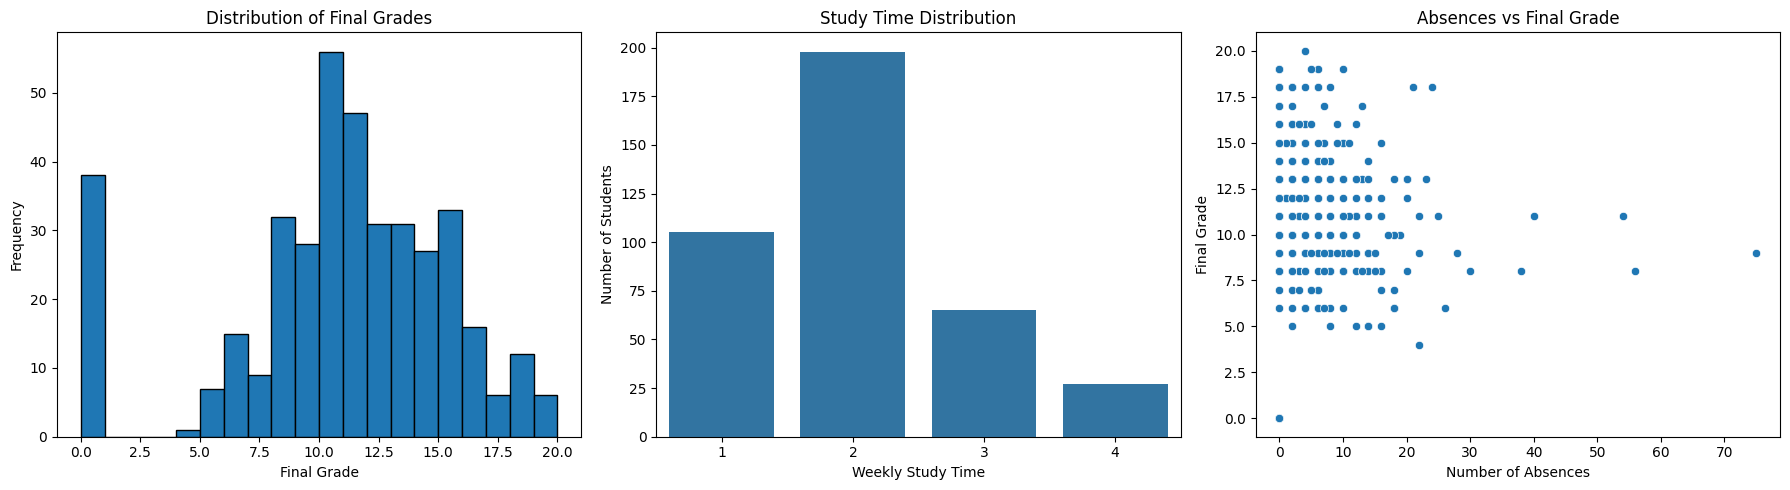

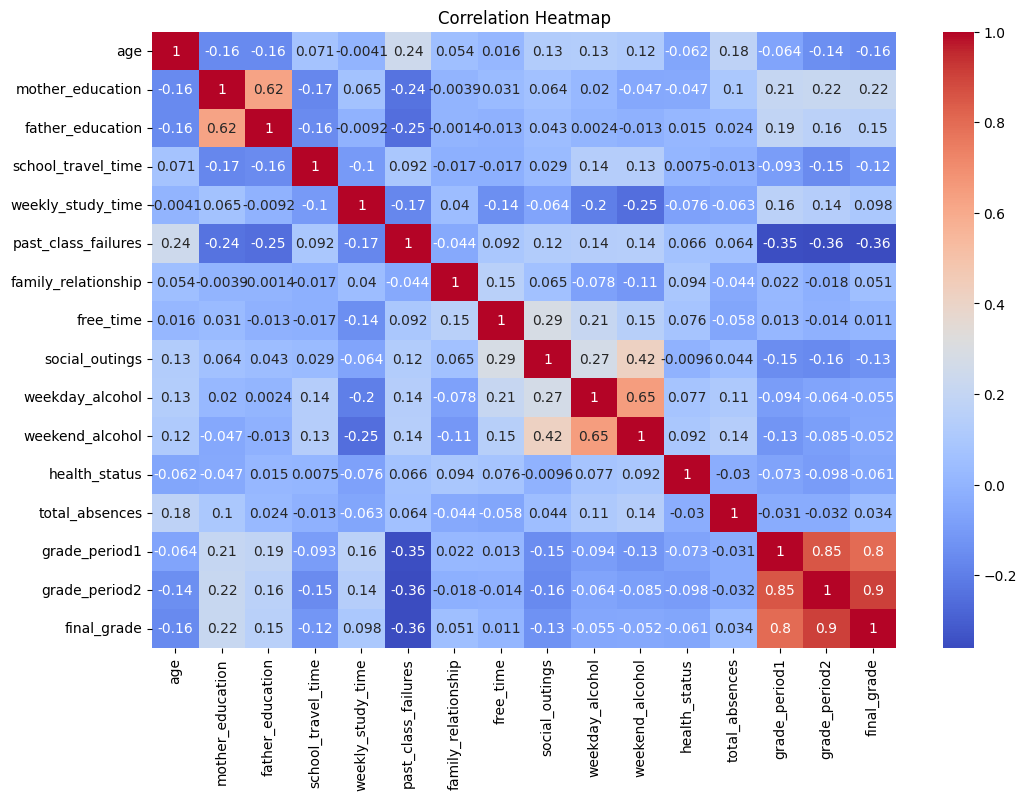

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Final Grades
student_performance['final_grade'].plot(kind='hist', bins=20, edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Final Grades')
axes[0].set_xlabel('Final Grade')
axes[0].set_ylabel('Frequency')

# Plot 2: Study Time Distribution
sns.countplot(x='weekly_study_time', data=student_performance, ax=axes[1])
axes[1].set_title('Study Time Distribution')
axes[1].set_xlabel('Weekly Study Time')
axes[1].set_ylabel('Number of Students')

# Plot 3: Absences vs Final Grade
sns.scatterplot(x='total_absences', y='final_grade', data=student_performance, ax=axes[2])
axes[2].set_title('Absences vs Final Grade')
axes[2].set_xlabel('Number of Absences')
axes[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()



plt.figure(figsize=(12,8))
sns.heatmap(student_performance.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FEATURE ENGINEERING

In [13]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   school_name           395 non-null    category
 1   gender                395 non-null    category
 2   age                   395 non-null    int64   
 3   urban_or_rural        395 non-null    category
 4   family_size           395 non-null    category
 5   parents_together      395 non-null    category
 6   mother_education      395 non-null    int64   
 7   father_education      395 non-null    int64   
 8   mother_job            395 non-null    category
 9   father_job            395 non-null    category
 10  school_choice_reason  395 non-null    category
 11  guardian_name         395 non-null    category
 12  school_travel_time    395 non-null    int64   
 13  weekly_study_time     395 non-null    int64   
 14  past_class_failures   395 non-null    int64   
 15  school

In [14]:
num_cols = list(student_performance.dtypes[(student_performance.dtypes == 'int64') | (student_performance.dtypes == 'float64')].index)

for col in cat_cols:
    print(student_performance.groupby(col)['final_grade'].mean())
for col in num_cols:
    print(student_performance.groupby(col)['final_grade'].mean())

school_name
GP    10.489971
MS     9.847826
Name: final_grade, dtype: float64
gender
F     9.966346
M    10.914439
Name: final_grade, dtype: float64
urban_or_rural
R     9.511364
U    10.674267
Name: final_grade, dtype: float64
family_size
GT3    10.177936
LE3    11.000000
Name: final_grade, dtype: float64
parents_together
A    11.195122
T    10.324859
Name: final_grade, dtype: float64
mother_job
at_home      9.152542
health      12.147059
other        9.822695
services    11.019417
teacher     11.051724
Name: final_grade, dtype: float64
father_job
at_home     10.150000
health      11.611111
other       10.193548
services    10.297297
teacher     11.965517
Name: final_grade, dtype: float64
school_choice_reason
course         9.820690
home          10.256881
other         11.166667
reputation    11.142857
Name: final_grade, dtype: float64
guardian_name
father    10.688889
mother    10.483516
other      9.062500
Name: final_grade, dtype: float64
school_support
no     10.561047
yes     9.

C:\Users\jayat\AppData\Local\Temp\ipykernel_1372\803990388.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(student_performance.groupby(col)['final_grade'].mean())


<Axes: ylabel='Density'>

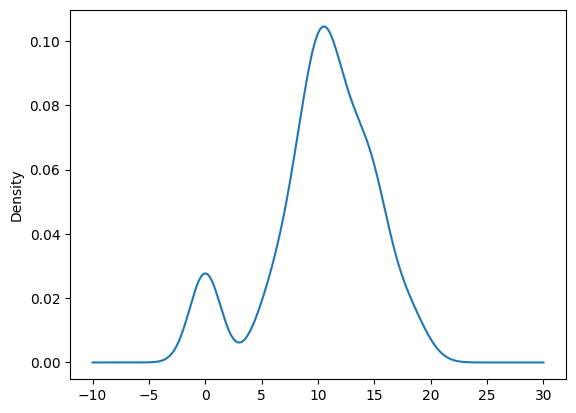

In [15]:
student_performance['final_grade'].plot.kde()

In [16]:
for col in num_cols:
    print(student_performance[col].value_counts())

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
mother_education
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
father_education
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
school_travel_time
1    257
2    107
3     23
4      8
Name: count, dtype: int64
weekly_study_time
2    198
1    105
3     65
4     27
Name: count, dtype: int64
past_class_failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64
family_relationship
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64
free_time
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64
social_outings
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64
weekday_alcohol
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64
weekend_alcohol
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64
health_status
5    146
3     91
4     6

In [ ]:
cat_cols = ['mother_job']

num_cols = list(student_performance.dtypes[(student_performance.dtypes == 'int64') | (student_performance.dtypes == 'float64')].index)
num_cols.remove('final_grade')

outliers = ['total_absences']

ordinal_enc = ['wants_higher_ed', 'mother_education', 'father_education']

for col in outliers + ordinal_enc:
    if col in num_cols:
        num_cols.remove(col)

num_pipeline = Pipeline([
    ('transform', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scale', StandardScaler())
])

outlier_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('scale', StandardScaler())
])

preprocessing = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('transform and scale', num_pipeline, num_cols),
    ('outliers', outlier_pipeline, outliers),
    ('ordinal', OrdinalEncoder(), ordinal_enc)
], remainder='passthrough')

age


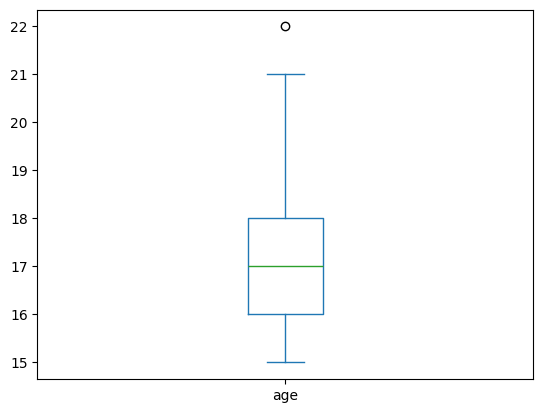

school_travel_time


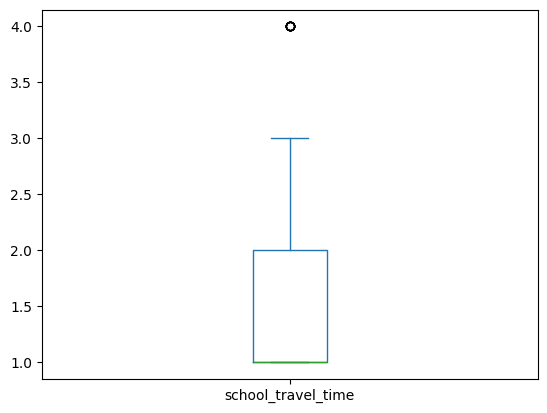

weekly_study_time


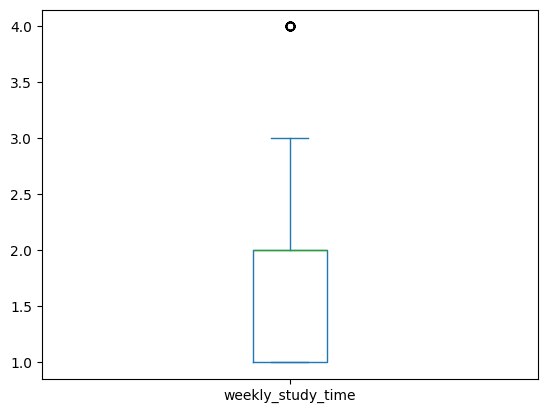

past_class_failures


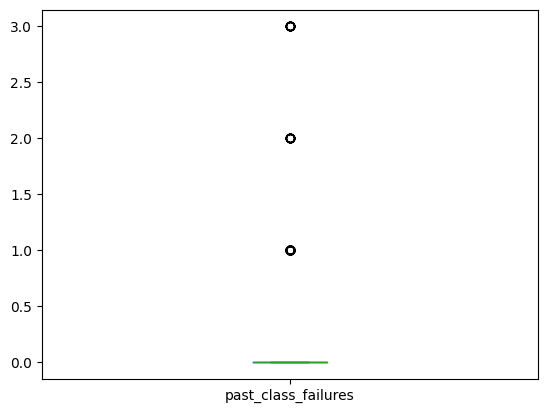

family_relationship


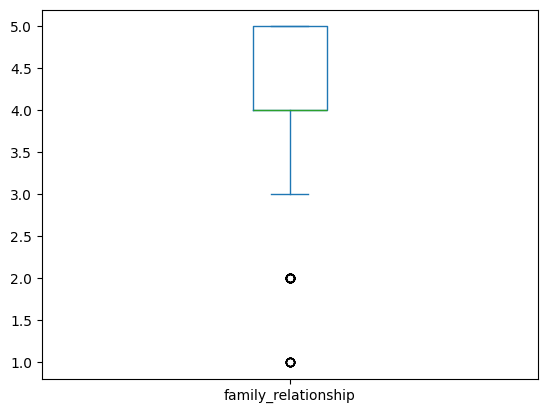

free_time


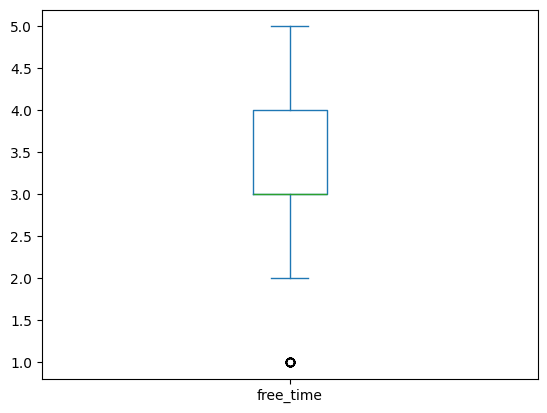

social_outings


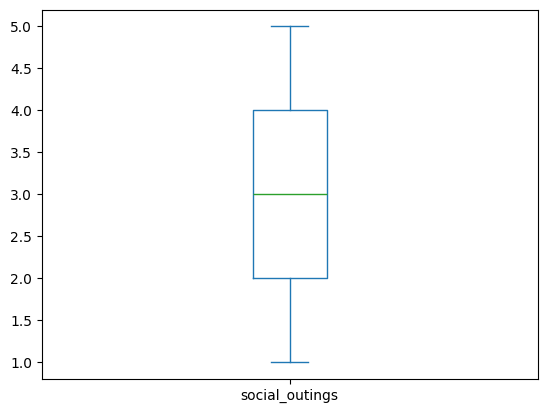

weekday_alcohol


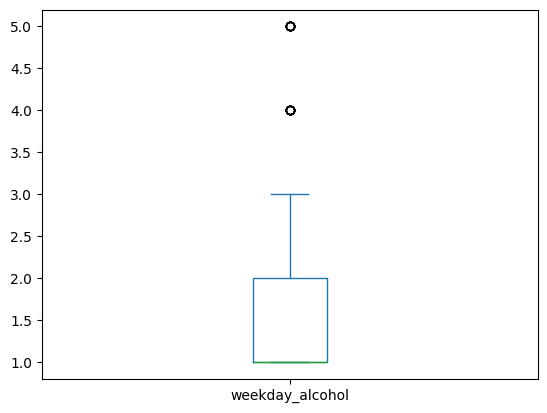

weekend_alcohol


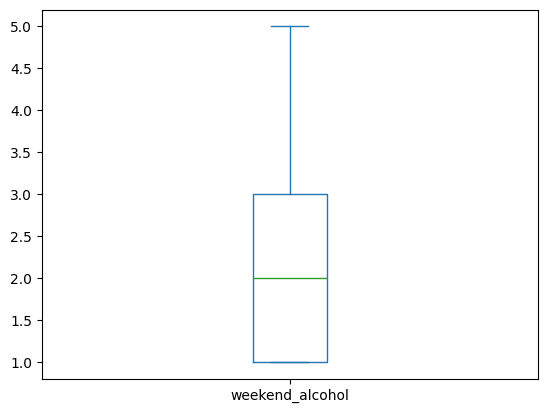

health_status


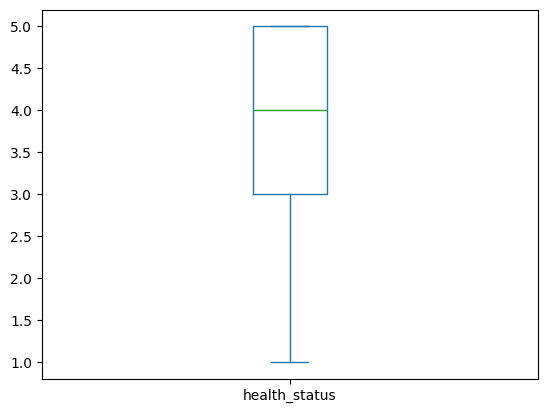

grade_period1


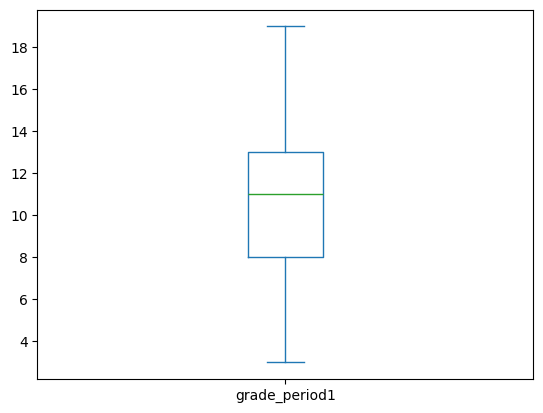

grade_period2


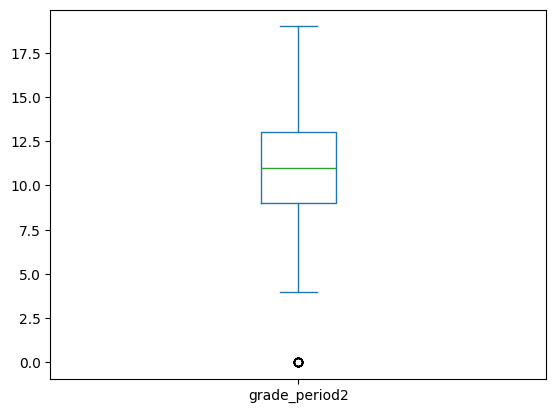

In [21]:
for col in num_cols:
    print(col)
    student_performance[col].plot.box()
    plt.show()

<Axes: >

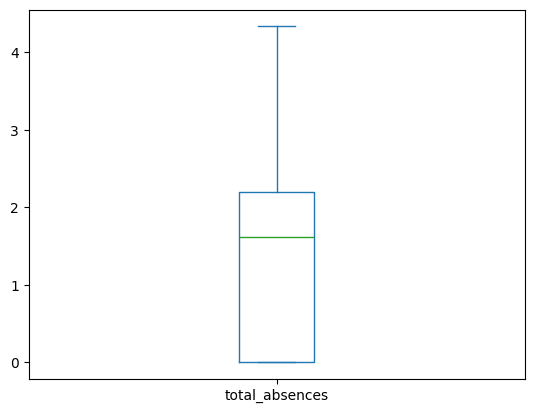

In [42]:
np.log1p(student_performance['total_absences']).plot.box()

In [22]:
student_performance['father_education'].value_counts()

father_education
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

MODEL TRAINING AND EVALUATION

In [24]:
target = 'final_grade'

X = student_performance[cat_cols + num_cols + outliers + ordinal_enc].copy()
y = student_performance[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

In [25]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

alphas = np.logspace(-4, 4, 50)  # from 1e-4 to 1e4

lasso = LassoCV(alphas = alphas)
lasso.fit(X_train_transformed, y_train)

rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, random_state=42, n_jobs=-1)
rf_grid.fit(X_train_transformed, y_train)
rf = rf_grid.best_estimator_

dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = RandomizedSearchCV(DecisionTreeRegressor(max_features=1.0,random_state=42), dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
dt_grid.fit(X_train_transformed, y_train)
dt_reg = dt_grid.best_estimator_

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbr_grid = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gbr_grid.fit(X_train_transformed, y_train)
gbr = gbr_grid.best_estimator_

svr_params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1, 1]
}
svr_grid = RandomizedSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svr_grid.fit(X_train_transformed, y_train)
svr = svr_grid.best_estimator_

In [26]:
X_train['mother_job'].value_counts()

mother_job
other       110
services     84
at_home      51
teacher      44
health       27
Name: count, dtype: int64

In [ ]:
scoring = 'r2'

models = {
    'Linear Regression': lr,
    'Lasso Regression': lasso,
    'Decision Tree Regression': dt_reg,
    'Gradient Boosting Regression': gbr,
    'Random Forest Regressor': rf,
    'SVR': svr
}

kf = KFold(n_splits=10,shuffle=True,random_state=42)
 
results=[]

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})
    scores = cross_val_score(model, X_train_transformed, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    print(f"{name}: CV R2 = {np.mean(scores):.4f}")

Linear Regression: CV R2 = 0.8426
Lasso Regression: CV R2 = 0.8500
Decision Tree Regression: CV R2 = 0.8012
Gradient Boosting Regression: CV R2 = 0.8619
Random Forest Regressor: CV R2 = 0.8132
SVR: CV R2 = 0.8595


DISPLAY RESULTS

Model Performance Comparison:
                          Model      RMSE  R2 Score
3  Gradient Boosting Regression  1.741090  0.852164
4       Random Forest Regressor  1.831190  0.836467
1              Lasso Regression  2.027769  0.799472
0             Linear Regression  2.112124  0.782441
2      Decision Tree Regression  2.168716  0.770626
5                           SVR  2.311278  0.739479


C:\Users\jayat\AppData\Local\Temp\ipykernel_1372\1001994671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='RMSE', ascending=False), x='Model', y='RMSE',palette="pastel")


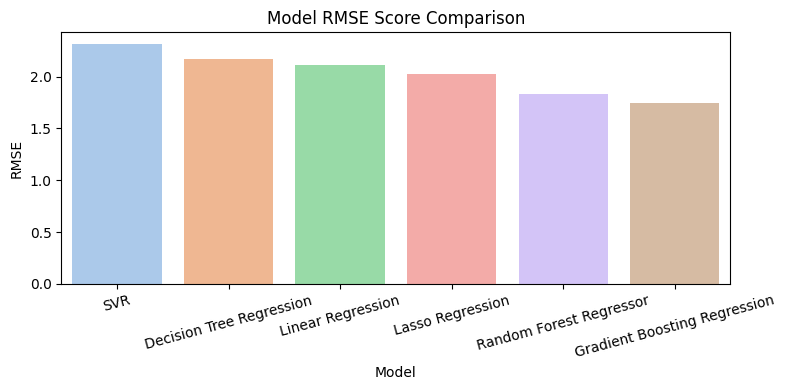

C:\Users\jayat\AppData\Local\Temp\ipykernel_1372\1001994671.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='R2 Score', ascending=False), x='Model', y='R2 Score',palette="pastel")


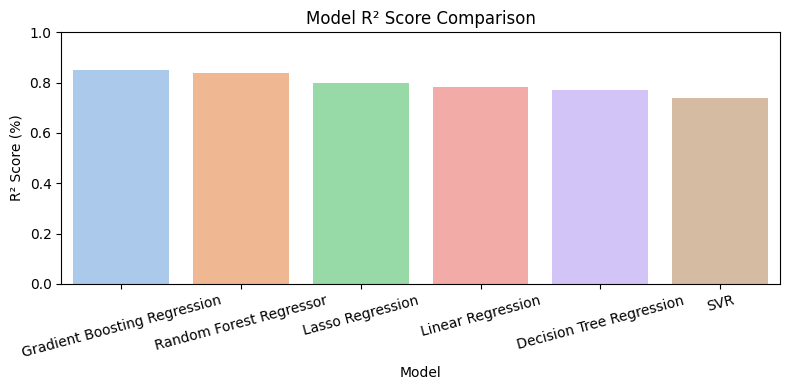

In [64]:
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.sort_values(by="R2 Score", ascending=False))


# Visualize Model Performance (RMSE)
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df.sort_values(by='RMSE', ascending=False), x='Model', y='RMSE',palette="pastel")
plt.title('Model RMSE Score Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#Visualize Model Performance (R2)
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df.sort_values(by='R2 Score', ascending=False), x='Model', y='R2 Score',palette="pastel")
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score (%)')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [54]:
X_train_transformed.shape

(316, 20)

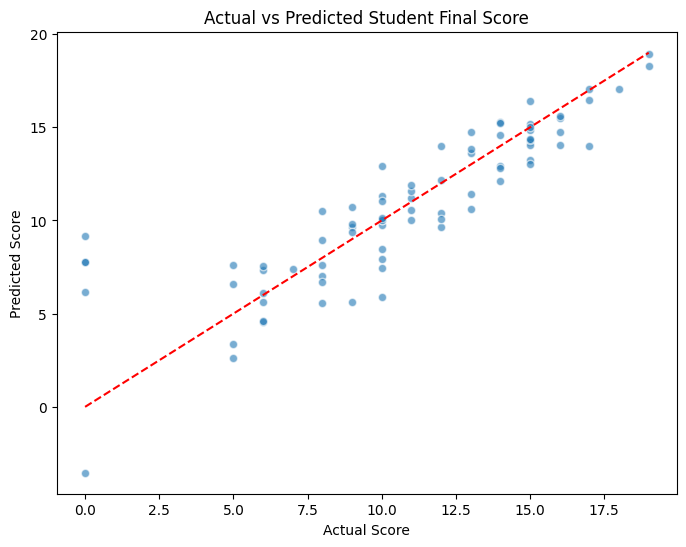

In [71]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Student Final Score")
plt.show()